# Importing Library and Data


In [28]:
# Data Processing & Modelling Libaries
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GroupShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [12]:
# Train, test split
# Load your data
data = pd.read_csv('../Data/processed_data_updated.csv')

# Features (X) and labels (y)
X = data.drop(columns=['label'])
y = data['label']
groups = data['gene_id']  # Use gene_id as groups

# Create GroupShuffleSplit instance
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3, random_state=42)

# Split into train and temporary sets (70% train, 30% temp)
for train_idx, temp_idx in gss.split(X, y, groups):
    X_train, X_temp = X.iloc[train_idx], X.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]
    groups_temp = groups.iloc[temp_idx]

# Further split the temporary set into validation and test sets (50% val, 50% test)
gss_val_test = GroupShuffleSplit(n_splits=1, train_size=0.5, test_size=0.5, random_state=42)

for val_idx, test_idx in gss_val_test.split(X_temp, y_temp, groups_temp):
    X_val, X_test = X_temp.iloc[val_idx], X_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

# Combine features and labels back for exporting
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV
train_data.to_csv('../Data/train_data_updated.csv', index=False)
val_data.to_csv('../Data/val_data_updated.csv', index=False)
test_data.to_csv('../Data/test_data_updated.csv', index=False)

In [13]:
data.head()

,ENST_ID,Position,Key,gene_id,transcript_id,transcript_position,label,mean_Value_1,mean_Value_2,mean_Value_3,...,std_Value_2,std_Value_3,std_Value_4,std_Value_5,std_Value_6,std_Value_7,std_Value_8,std_Value_9,transcript_id_encoded,Key_encoded
0,ENST00000514332,579,CAAACAA,ENSG00000169045,ENST00000514332,579,0,0.007097,2.389750,104.571429,...,0.612728,1.859888,0.003986,0.901436,2.426028,0.002800,0.917633,2.698873,4374,72
1,ENST00000374902,2482,CTGACAG,ENSG00000136891,ENST00000374902,2482,0,0.007560,3.764643,106.964286,...,1.592051,2.471005,0.002169,3.209042,4.334690,0.004028,0.875664,2.878208,2968,134
2,ENST00000217026,1738,CAGACCC,ENSG00000101057,ENST00000217026,1738,0,0.009036,8.260000,108.836538,...,1.273614,5.080393,0.005056,1.797610,2.087137,0.002622,1.798742,2.469029,151,89
3,ENST00000394803,1321,AGAACAG,ENSG00000109332,ENST00000394803,1321,0,0.008855,7.054000,128.133333,...,2.591058,3.547143,0.003670,1.778136,3.732446,0.002679,1.131974,2.297042,3364,26
4,ENST00000249014,598,GGGACAC,ENSG00000128283,ENST00000249014,598,0,0.009415,4.048154,117.128205,...,1.761297,3.155618,0.008608,3.041126,4.770816,0.004297,1.206101,2.725645,474,181


In [14]:
train_data.head()

,ENST_ID,Position,Key,gene_id,transcript_id,transcript_position,mean_Value_1,mean_Value_2,mean_Value_3,mean_Value_4,...,std_Value_3,std_Value_4,std_Value_5,std_Value_6,std_Value_7,std_Value_8,std_Value_9,transcript_id_encoded,Key_encoded,label
0,ENST00000514332,579,CAAACAA,ENSG00000169045,ENST00000514332,579,0.007097,2.389750,104.571429,0.006643,...,1.859888,0.003986,0.901436,2.426028,0.002800,0.917633,2.698873,4374,72,0
2,ENST00000217026,1738,CAGACCC,ENSG00000101057,ENST00000217026,1738,0.009036,8.260000,108.836538,0.011480,...,5.080393,0.005056,1.797610,2.087137,0.002622,1.798742,2.469029,151,89,0
3,ENST00000394803,1321,AGAACAG,ENSG00000109332,ENST00000394803,1321,0.008855,7.054000,128.133333,0.008535,...,3.547143,0.003670,1.778136,3.732446,0.002679,1.131974,2.297042,3364,26,0
4,ENST00000249014,598,GGGACAC,ENSG00000128283,ENST00000249014,598,0.009415,4.048154,117.128205,0.009710,...,3.155618,0.008608,3.041126,4.770816,0.004297,1.206101,2.725645,474,181,0
6,ENST00000618966,839,CTAACAA,ENSG00000275216,ENST00000618966,839,0.008583,1.840789,90.740000,0.008351,...,2.239583,0.005836,0.505871,1.912230,0.004654,0.758229,1.876533,5192,120,0


# Declare feature vector and target variable

In [16]:
# Drop features that are not needed / redundant
# Split into X,y
X_train = train_data.drop(columns=['label','gene_id','transcript_id','Key','ENST_ID'])
y_train = train_data['label']

X_val = val_data.drop(columns=['label','gene_id','transcript_id','Key','ENST_ID'])
y_val = val_data['label']

X_test = test_data.drop(columns=['label','gene_id','transcript_id','Key','ENST_ID'])
y_test = test_data['label']

In [17]:
# Checking Feature columns
X_train.head()

,Position,transcript_position,mean_Value_1,mean_Value_2,mean_Value_3,mean_Value_4,mean_Value_5,mean_Value_6,mean_Value_7,mean_Value_8,...,std_Value_2,std_Value_3,std_Value_4,std_Value_5,std_Value_6,std_Value_7,std_Value_8,std_Value_9,transcript_id_encoded,Key_encoded
0,579,579,0.007097,2.389750,104.571429,0.006643,2.526429,98.371429,0.005408,2.419286,...,0.612728,1.859888,0.003986,0.901436,2.426028,0.002800,0.917633,2.698873,4374,72
2,1738,1738,0.009036,8.260000,108.836538,0.011480,5.427885,128.096154,0.005846,3.924615,...,1.273614,5.080393,0.005056,1.797610,2.087137,0.002622,1.798742,2.469029,151,89
3,1321,1321,0.008855,7.054000,128.133333,0.008535,5.120667,95.853333,0.006006,3.055000,...,2.591058,3.547143,0.003670,1.778136,3.732446,0.002679,1.131974,2.297042,3364,26
4,598,598,0.009415,4.048154,117.128205,0.009710,7.149872,117.666667,0.007828,3.196282,...,1.761297,3.155618,0.008608,3.041126,4.770816,0.004297,1.206101,2.725645,474,181
6,839,839,0.008583,1.840789,90.740000,0.008351,1.756944,92.806667,0.008282,2.141222,...,0.586278,2.239583,0.005836,0.505871,1.912230,0.004654,0.758229,1.876533,5192,120


In [18]:
# Checking label column
y_train.head()

0    0
2    0
3    0
4    0
6    0
Name: label, dtype: int64

# Training the Model

In [19]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
#adding threshold
threshold_default = 0.5
threshold_1 = 0.4
threshold_2 = 0.6

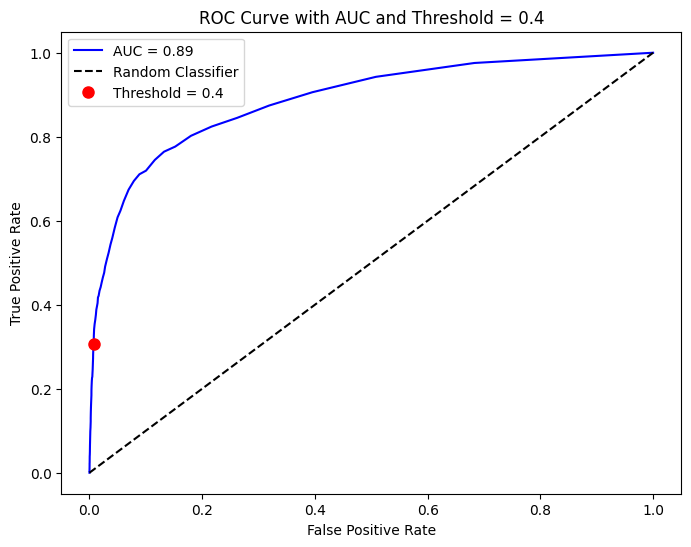

Validation ROC AUC Score: 0.89
Validation Accuracy Score (default threshold 0.5): 0.96
Validation Accuracy Score (threshold 0.4): 0.96
Threshold 0.4: TPR = 0.31, FPR = 0.01


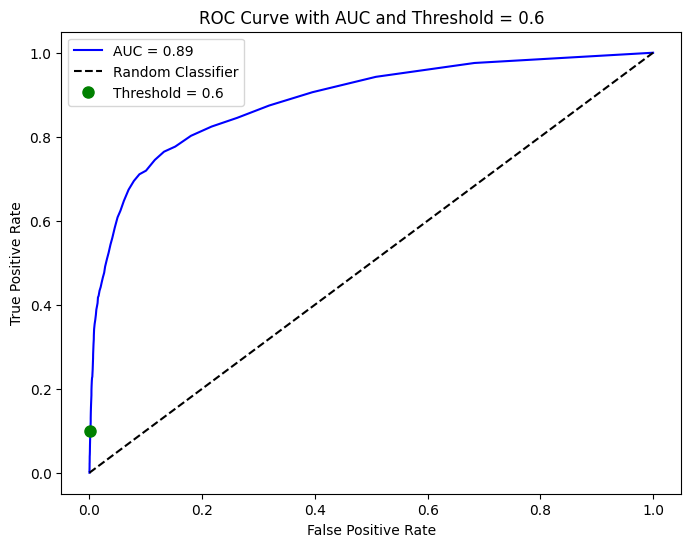

Validation Accuracy Score (threshold 0.6): 0.96
Threshold 0.6: TPR = 0.10, FPR = 0.00
Default Threshold 0.5: TPR = 0.21, FPR = 0.00


In [30]:
# Running on validation data
val_probabilities = rf.predict_proba(X_val)[:, 1]
val_predictions_default = (val_probabilities >= threshold_default).astype(int)
val_predictions_custom1 = (val_probabilities >= threshold_1).astype(int)
val_predictions_custom2 = (val_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_val, val_probabilities)
roc_auc = roc_auc_score(y_val, val_probabilities)

# Function to calculate TPR and FPR using confusion matrix for a given threshold
def calculate_tpr_fpr(y_true, y_pred, threshold_label):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr_custom = tp / (tp + fn)  # Sensitivity or Recall
    fpr_custom = fp / (fp + tn)  # Fall-out
    print(f"{threshold_label}: TPR = {tpr_custom:.2f}, FPR = {fpr_custom:.2f}")

# Plot ROC Curve with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(thresholds - threshold_1))
plt.plot(fpr[chosen_idx_1], tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_1
print(f'Validation ROC AUC Score: {roc_auc:.2f}')
print(f'Validation Accuracy Score (default threshold 0.5): {accuracy_score(y_val, val_predictions_default):.2f}')
print(f'Validation Accuracy Score (threshold {threshold_1}): {accuracy_score(y_val, val_predictions_custom1):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(thresholds - threshold_2))
plt.plot(fpr[chosen_idx_2], tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_2
print(f'Validation Accuracy Score (threshold {threshold_2}): {accuracy_score(y_val, val_predictions_custom2):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom2, f"Threshold {threshold_2}")

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_val, val_predictions_default, "Default Threshold 0.5")

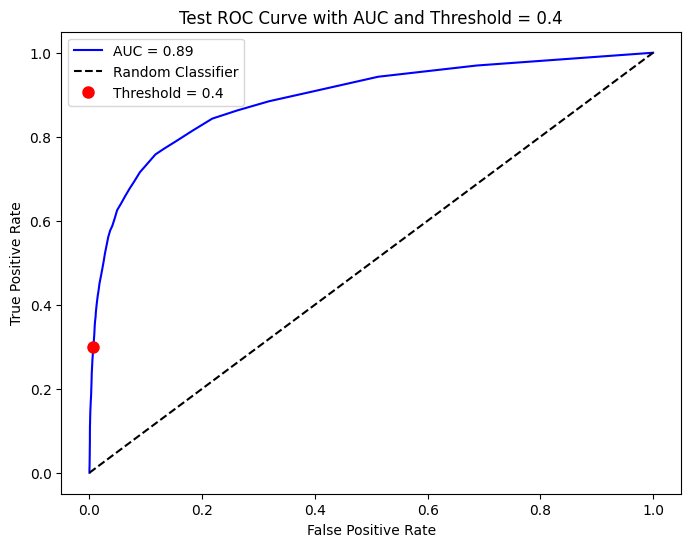

Test ROC AUC Score: 0.89
Test Accuracy Score (default threshold 0.5): 0.96
Test Accuracy Score (threshold 0.4): 0.96
Threshold 0.4: TPR = 0.30, FPR = 0.01


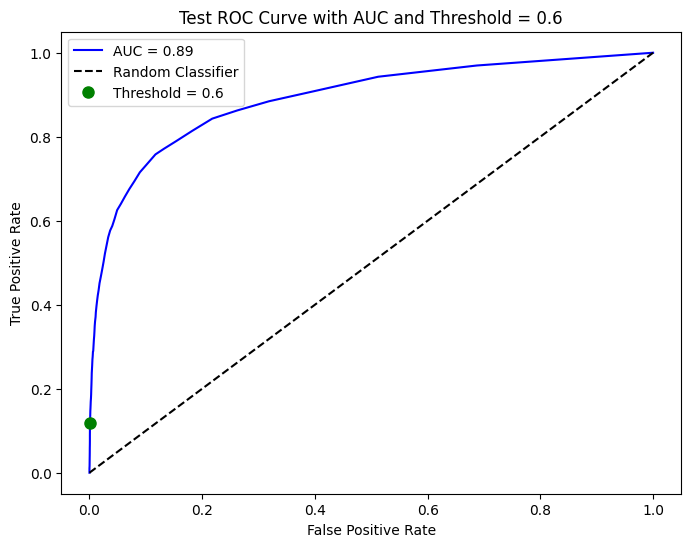

Test Accuracy Score (threshold 0.6): 0.96
Threshold 0.6: TPR = 0.12, FPR = 0.00
Default Threshold 0.5: TPR = 0.20, FPR = 0.00


In [31]:
# Running on test data
test_probabilities = rf.predict_proba(X_test)[:, 1]
test_predictions_default = (test_probabilities >= threshold_default).astype(int)
test_predictions_custom1 = (test_probabilities >= threshold_1).astype(int)
test_predictions_custom2 = (test_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probabilities)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

# Plot ROC Curve for test data with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(test_thresholds - threshold_1))
plt.plot(test_fpr[chosen_idx_1], test_tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_1
print(f'Test ROC AUC Score: {test_roc_auc:.2f}')
print(f'Test Accuracy Score (default threshold 0.5): {accuracy_score(y_test, test_predictions_default):.2f}')
print(f'Test Accuracy Score (threshold {threshold_1}): {accuracy_score(y_test, test_predictions_custom1):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve for test data with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(test_thresholds - threshold_2))
plt.plot(test_fpr[chosen_idx_2], test_tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_2
print(f'Test Accuracy Score (threshold {threshold_2}): {accuracy_score(y_test, test_predictions_custom2):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom2, f"Threshold {threshold_2}")

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_test, test_predictions_default, "Default Threshold 0.5")

# Training RF while Addressing Class Imbalance




In [33]:
# Addressing Class Imbalance of the data set
# To see if Accuracy & ROC_AUC score will improve
# Using sklearn class_weight parameter to address imbalance
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
rf2 = RandomForestClassifier(class_weight='balanced')
rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

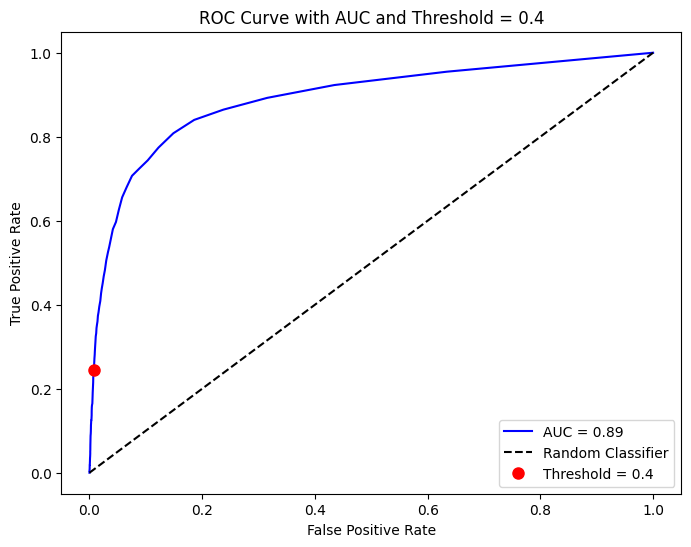

Validation ROC AUC Score: 0.89
Validation Accuracy Score (default threshold 0.5): 0.96
Validation Accuracy Score (threshold 0.4): 0.96
Threshold 0.4: TPR = 0.24, FPR = 0.01


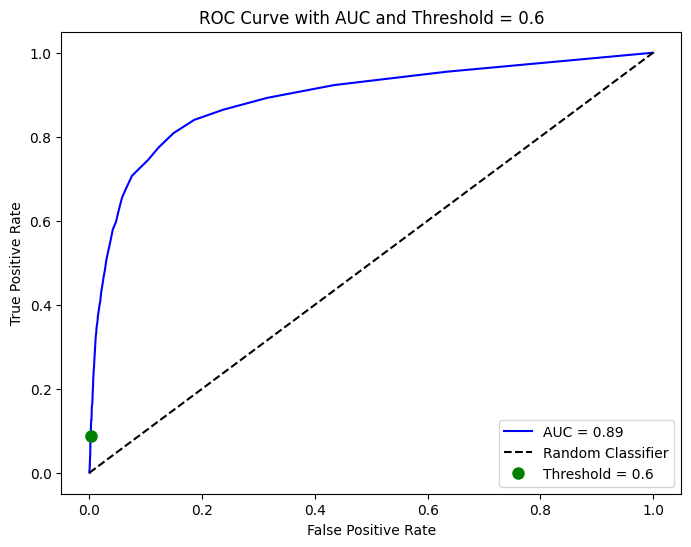

Validation Accuracy Score (threshold 0.6): 0.96
Threshold 0.6: TPR = 0.09, FPR = 0.00
Default Threshold 0.5: TPR = 0.16, FPR = 0.00


In [34]:
# Running on validation data
val_probabilities = rf2.predict_proba(X_val)[:, 1]
val_predictions_default = (val_probabilities >= threshold_default).astype(int)
val_predictions_custom1 = (val_probabilities >= threshold_1).astype(int)
val_predictions_custom2 = (val_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_val, val_probabilities)
roc_auc = roc_auc_score(y_val, val_probabilities)

# Plot ROC Curve with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(thresholds - threshold_1))
plt.plot(fpr[chosen_idx_1], tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_1
print(f'Validation ROC AUC Score: {roc_auc:.2f}')
print(f'Validation Accuracy Score (default threshold 0.5): {accuracy_score(y_val, val_predictions_default):.2f}')
print(f'Validation Accuracy Score (threshold {threshold_1}): {accuracy_score(y_val, val_predictions_custom1):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(thresholds - threshold_2))
plt.plot(fpr[chosen_idx_2], tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_2
print(f'Validation Accuracy Score (threshold {threshold_2}): {accuracy_score(y_val, val_predictions_custom2):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom2, f"Threshold {threshold_2}")

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_val, val_predictions_default, "Default Threshold 0.5")

Default Threshold 0.5: TPR = 0.17, FPR = 0.00
Test Accuracy Score (default threshold 0.5): 0.96


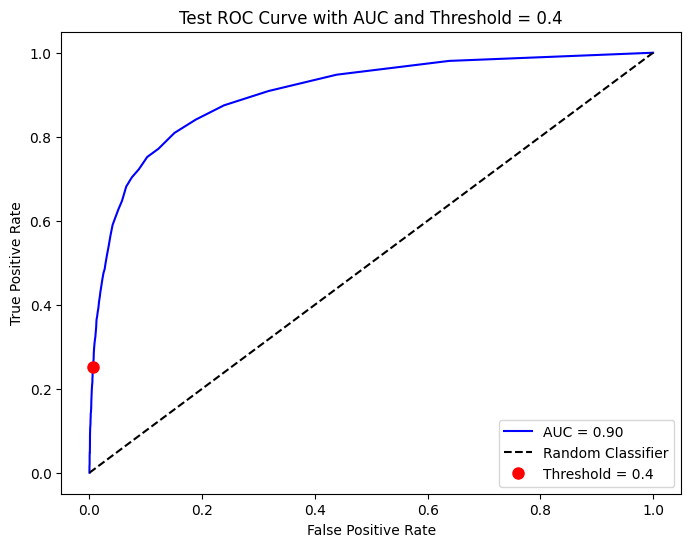

Test ROC AUC Score: 0.90
Test Accuracy Score (threshold 0.4): 0.96
Threshold 0.4: TPR = 0.25, FPR = 0.01


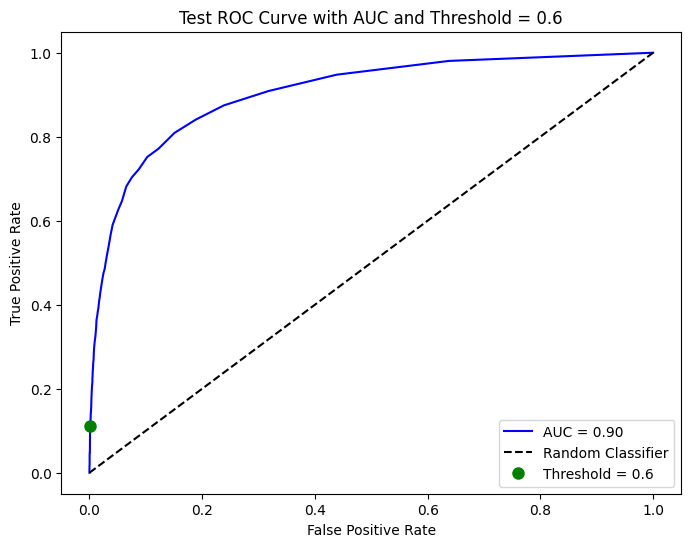

Test Accuracy Score (threshold 0.6): 0.96
Threshold 0.6: TPR = 0.11, FPR = 0.00


In [35]:
# Running on test data
test_probabilities = rf2.predict_proba(X_test)[:, 1]
test_predictions_default = (test_probabilities >= threshold_default).astype(int)
test_predictions_custom1 = (test_probabilities >= threshold_1).astype(int)
test_predictions_custom2 = (test_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probabilities)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_test, test_predictions_default, "Default Threshold 0.5")
print(f'Test Accuracy Score (default threshold 0.5): {accuracy_score(y_test, test_predictions_default):.2f}')

# Plot ROC Curve for test data with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(test_thresholds - threshold_1))
plt.plot(test_fpr[chosen_idx_1], test_tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_1
print(f'Test ROC AUC Score: {test_roc_auc:.2f}')
print(f'Test Accuracy Score (threshold {threshold_1}): {accuracy_score(y_test, test_predictions_custom1):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve for test data with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(test_thresholds - threshold_2))
plt.plot(test_fpr[chosen_idx_2], test_tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_2
print(f'Test Accuracy Score (threshold {threshold_2}): {accuracy_score(y_test, test_predictions_custom2):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom2, f"Threshold {threshold_2}")



# Training RF while Addressing Class Imbalance (SMOTE)

In [36]:
# Using SMOTE to address class imbalance + class_weights
# Oversampling the minority class

smote = SMOTE(random_state=42)
X_train2, y_train2 = smote.fit_resample(X_train, y_train)

rf3 = RandomForestClassifier(class_weight='balanced')
rf3.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced')

Default Threshold 0.5: TPR = 0.49, FPR = 0.03
Validation Accuracy Score (default threshold 0.5): 0.95


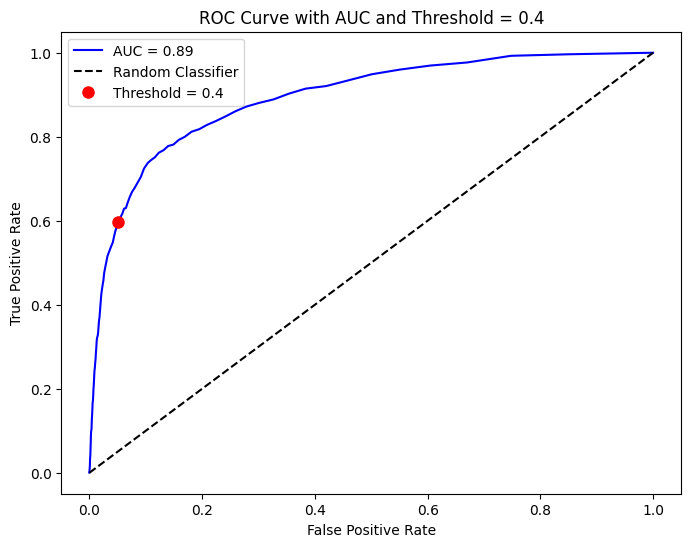

Validation ROC AUC Score: 0.89
Validation Accuracy Score (threshold 0.4): 0.93
Threshold 0.4: TPR = 0.60, FPR = 0.05


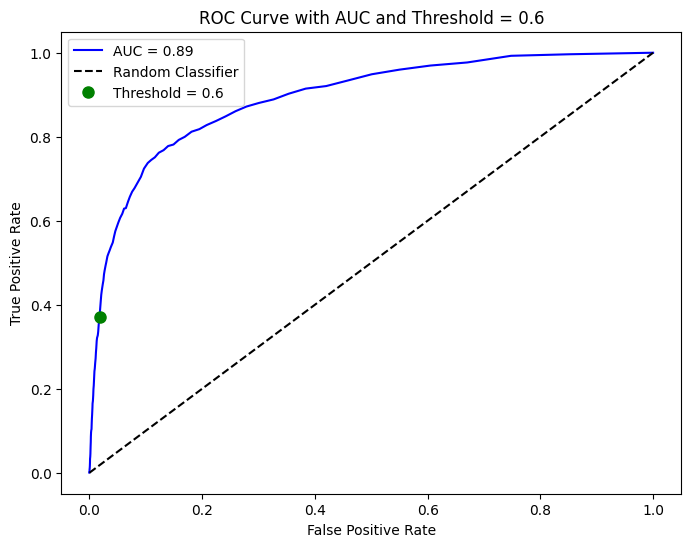

Validation Accuracy Score (threshold 0.6): 0.95
Threshold 0.6: TPR = 0.37, FPR = 0.02


In [37]:
# Running on validation data
val_probabilities = rf3.predict_proba(X_val)[:, 1]
val_predictions_default = (val_probabilities >= threshold_default).astype(int)
val_predictions_custom1 = (val_probabilities >= threshold_1).astype(int)
val_predictions_custom2 = (val_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_val, val_probabilities)
roc_auc = roc_auc_score(y_val, val_probabilities)

# Plot ROC Curve with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_val, val_predictions_default, "Default Threshold 0.5")
print(f'Validation Accuracy Score (default threshold 0.5): {accuracy_score(y_val, val_predictions_default):.2f}')

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(thresholds - threshold_1))
plt.plot(fpr[chosen_idx_1], tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_1
print(f'Validation ROC AUC Score: {roc_auc:.2f}')
print(f'Validation Accuracy Score (threshold {threshold_1}): {accuracy_score(y_val, val_predictions_custom1):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(thresholds - threshold_2))
plt.plot(fpr[chosen_idx_2], tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_2
print(f'Validation Accuracy Score (threshold {threshold_2}): {accuracy_score(y_val, val_predictions_custom2):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom2, f"Threshold {threshold_2}")



Default Threshold 0.5: TPR = 0.52, FPR = 0.03
Test Accuracy Score (default threshold 0.5): 0.95


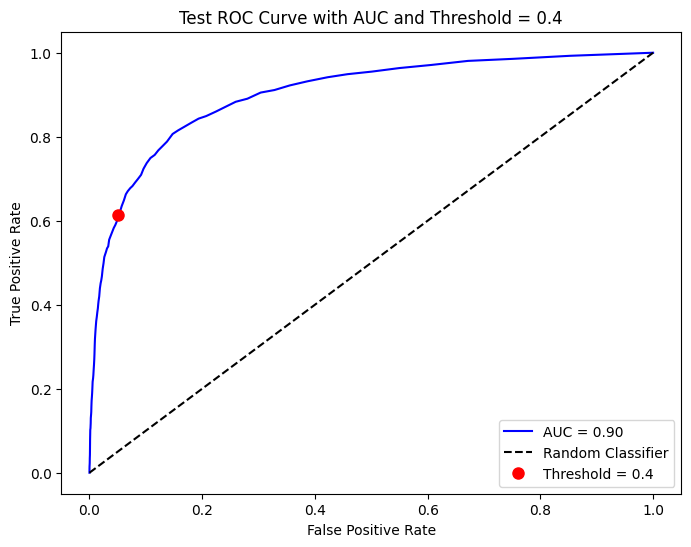

Test ROC AUC Score: 0.90
Test Accuracy Score (threshold 0.4): 0.93
Threshold 0.4: TPR = 0.61, FPR = 0.05


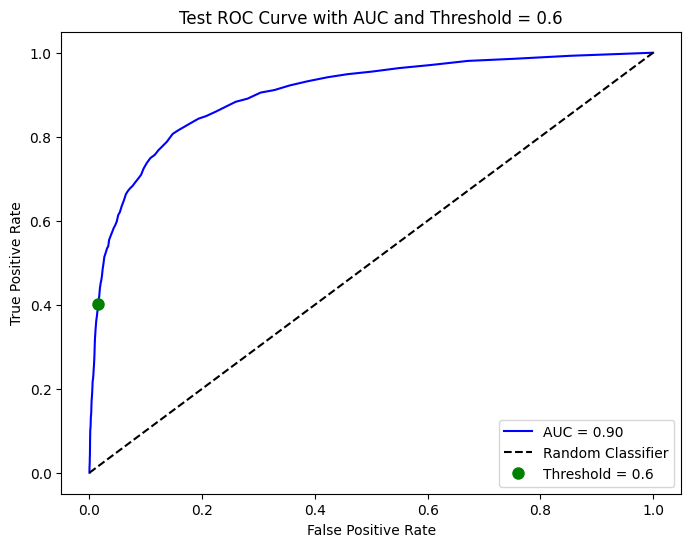

Test Accuracy Score (threshold 0.6): 0.96
Threshold 0.6: TPR = 0.40, FPR = 0.02


In [38]:
# Running on test data
test_probabilities = rf3.predict_proba(X_test)[:, 1]
test_predictions_default = (test_probabilities >= threshold_default).astype(int)
test_predictions_custom1 = (test_probabilities >= threshold_1).astype(int)
test_predictions_custom2 = (test_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probabilities)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_test, test_predictions_default, "Default Threshold 0.5")
print(f'Test Accuracy Score (default threshold 0.5): {accuracy_score(y_test, test_predictions_default):.2f}')

# Plot ROC Curve for test data with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(test_thresholds - threshold_1))
plt.plot(test_fpr[chosen_idx_1], test_tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_1
print(f'Test ROC AUC Score: {test_roc_auc:.2f}')
print(f'Test Accuracy Score (threshold {threshold_1}): {accuracy_score(y_test, test_predictions_custom1):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve for test data with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(test_thresholds - threshold_2))
plt.plot(test_fpr[chosen_idx_2], test_tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_2
print(f'Test Accuracy Score (threshold {threshold_2}): {accuracy_score(y_test, test_predictions_custom2):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom2, f"Threshold {threshold_2}")



# Training RF while Addressing Class Imbalance (Scaler)


In [39]:
# Addressing class imbalance adding scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
rf4 = RandomForestClassifier(class_weight='balanced')
rf4.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced')

Default Threshold 0.5: TPR = 0.49, FPR = 0.03
Validation Accuracy Score (default threshold 0.5): 0.95


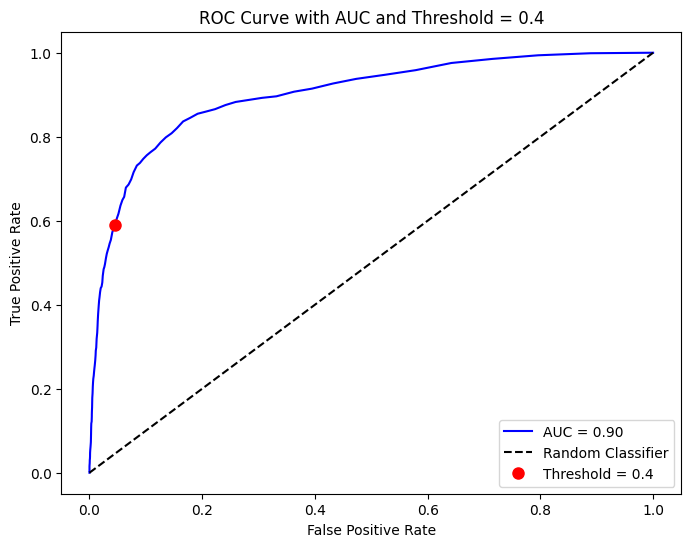

Validation ROC AUC Score: 0.90
Validation Accuracy Score (threshold 0.4): 0.94
Threshold 0.4: TPR = 0.59, FPR = 0.05


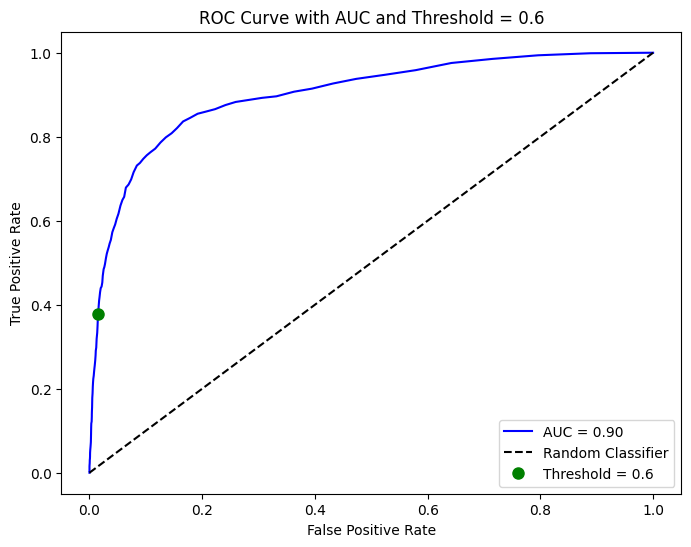

Validation Accuracy Score (threshold 0.6): 0.96
Threshold 0.6: TPR = 0.38, FPR = 0.02


In [42]:
# Running on validation data
val_probabilities = rf4.predict_proba(X_val_scaled)[:, 1]
val_predictions_default = (val_probabilities >= threshold_default).astype(int)
val_predictions_custom1 = (val_probabilities >= threshold_1).astype(int)
val_predictions_custom2 = (val_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_val, val_probabilities)
roc_auc = roc_auc_score(y_val, val_probabilities)

# Plot ROC Curve with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_val, val_predictions_default, "Default Threshold 0.5")
print(f'Validation Accuracy Score (default threshold 0.5): {accuracy_score(y_val, val_predictions_default):.2f}')

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(thresholds - threshold_1))
plt.plot(fpr[chosen_idx_1], tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_1
print(f'Validation ROC AUC Score: {roc_auc:.2f}')
print(f'Validation Accuracy Score (threshold {threshold_1}): {accuracy_score(y_val, val_predictions_custom1):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(thresholds - threshold_2))
plt.plot(fpr[chosen_idx_2], tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_2
print(f'Validation Accuracy Score (threshold {threshold_2}): {accuracy_score(y_val, val_predictions_custom2):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom2, f"Threshold {threshold_2}")



Default Threshold 0.5: TPR = 0.49, FPR = 0.03
Test Accuracy Score (default threshold 0.5): 0.95


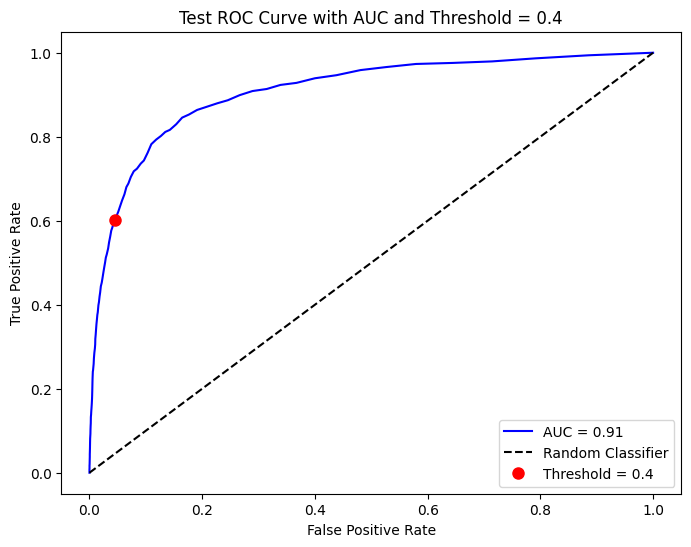

Test ROC AUC Score: 0.91
Test Accuracy Score (threshold 0.4): 0.94
Threshold 0.4: TPR = 0.60, FPR = 0.04


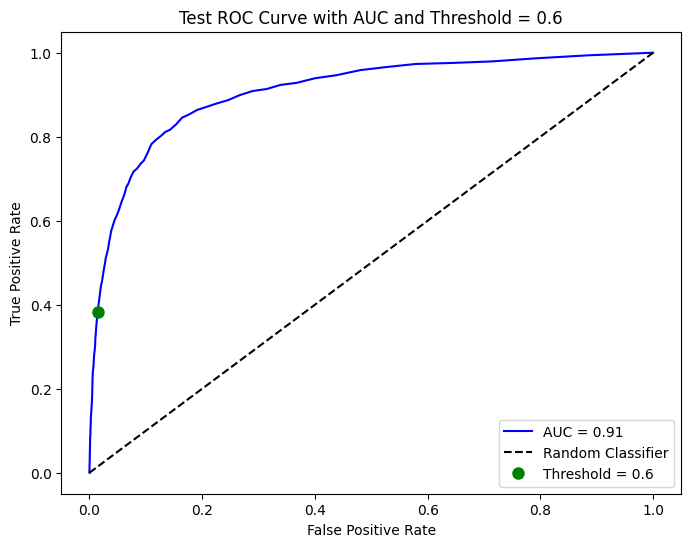

Test Accuracy Score (threshold 0.6): 0.96
Threshold 0.6: TPR = 0.38, FPR = 0.01


In [45]:
# Running on test data
test_probabilities = rf4.predict_proba(X_test_scaled)[:, 1]
test_predictions_default = (test_probabilities >= threshold_default).astype(int)
test_predictions_custom1 = (test_probabilities >= threshold_1).astype(int)
test_predictions_custom2 = (test_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probabilities)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_test, test_predictions_default, "Default Threshold 0.5")
print(f'Test Accuracy Score (default threshold 0.5): {accuracy_score(y_test, test_predictions_default):.2f}')

# Plot ROC Curve for test data with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(test_thresholds - threshold_1))
plt.plot(test_fpr[chosen_idx_1], test_tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_1
print(f'Test ROC AUC Score: {test_roc_auc:.2f}')
print(f'Test Accuracy Score (threshold {threshold_1}): {accuracy_score(y_test, test_predictions_custom1):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve for test data with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(test_thresholds - threshold_2))
plt.plot(test_fpr[chosen_idx_2], test_tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_2
print(f'Test Accuracy Score (threshold {threshold_2}): {accuracy_score(y_test, test_predictions_custom2):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom2, f"Threshold {threshold_2}")



# Feature Selection

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

model = SelectKBest(f_classif, k=10)
model.fit(X_train, y_train)
Selected_feature_names = X_train.columns[model.get_support()]
Selected_feature_names

Index(['mean_Value_3', 'mean_Value_6', 'median_Value_3', 'min_Value_3',
       'min_Value_5', 'min_Value_6', 'max_Value_3', 'max_Value_6',
       'std_Value_5', 'std_Value_6'],
      dtype='object')

In [47]:
# Extract the 20 features
X_train2 = X_train.filter(list(Selected_feature_names))
X_val2 = X_val.filter(list(Selected_feature_names))
X_test2 = X_test.filter(list(Selected_feature_names))

# Scaling X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_val_scaled = scaler.transform(X_val2)
X_test_scaled = scaler.transform(X_test2)

# SMOTE Resample
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Training RF Model
rf5 = RandomForestClassifier(class_weight='balanced')
rf5.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced')

Default Threshold 0.5: TPR = 0.36, FPR = 0.03
Validation Accuracy Score (default threshold 0.5): 0.94


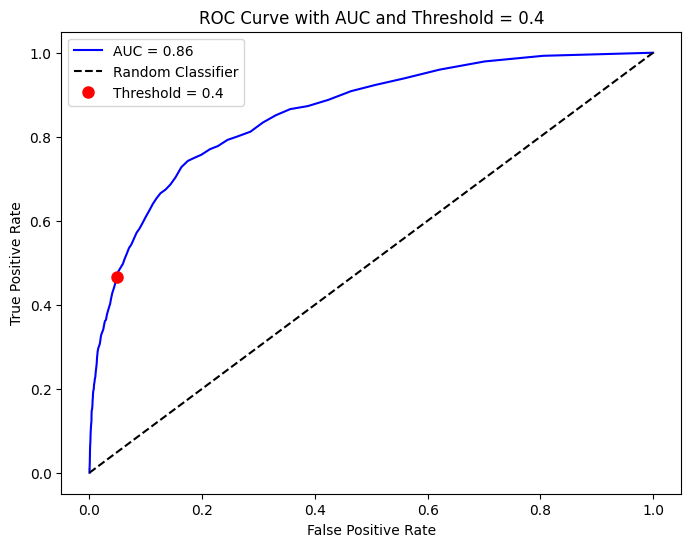

Validation ROC AUC Score: 0.86
Validation Accuracy Score (threshold 0.4): 0.93
Threshold 0.4: TPR = 0.47, FPR = 0.05


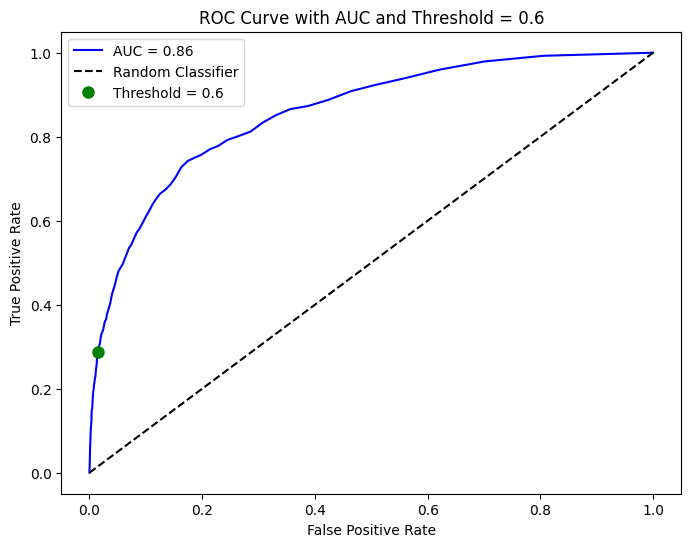

Validation Accuracy Score (threshold 0.6): 0.95
Threshold 0.6: TPR = 0.29, FPR = 0.01


In [48]:
# Running on validation data
val_probabilities = rf5.predict_proba(X_val_scaled)[:, 1]
val_predictions_default = (val_probabilities >= threshold_default).astype(int)
val_predictions_custom1 = (val_probabilities >= threshold_1).astype(int)
val_predictions_custom2 = (val_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_val, val_probabilities)
roc_auc = roc_auc_score(y_val, val_probabilities)

# Plot ROC Curve with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_val, val_predictions_default, "Default Threshold 0.5")
print(f'Validation Accuracy Score (default threshold 0.5): {accuracy_score(y_val, val_predictions_default):.2f}')

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(thresholds - threshold_1))
plt.plot(fpr[chosen_idx_1], tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_1
print(f'Validation ROC AUC Score: {roc_auc:.2f}')
print(f'Validation Accuracy Score (threshold {threshold_1}): {accuracy_score(y_val, val_predictions_custom1):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(thresholds - threshold_2))
plt.plot(fpr[chosen_idx_2], tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print validation metrics and TPR/FPR for threshold_2
print(f'Validation Accuracy Score (threshold {threshold_2}): {accuracy_score(y_val, val_predictions_custom2):.2f}')
calculate_tpr_fpr(y_val, val_predictions_custom2, f"Threshold {threshold_2}")

Default Threshold 0.5: TPR = 0.38, FPR = 0.02
Test Accuracy Score (default threshold 0.5): 0.95


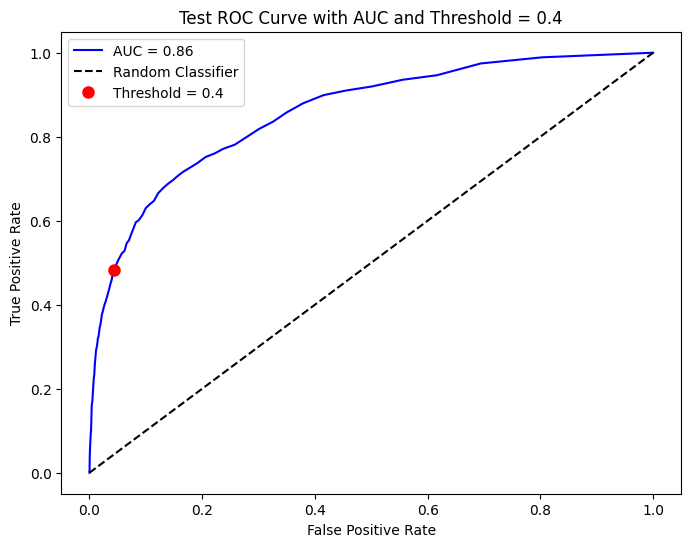

Test ROC AUC Score: 0.86
Test Accuracy Score (threshold 0.4): 0.93
Threshold 0.4: TPR = 0.48, FPR = 0.04


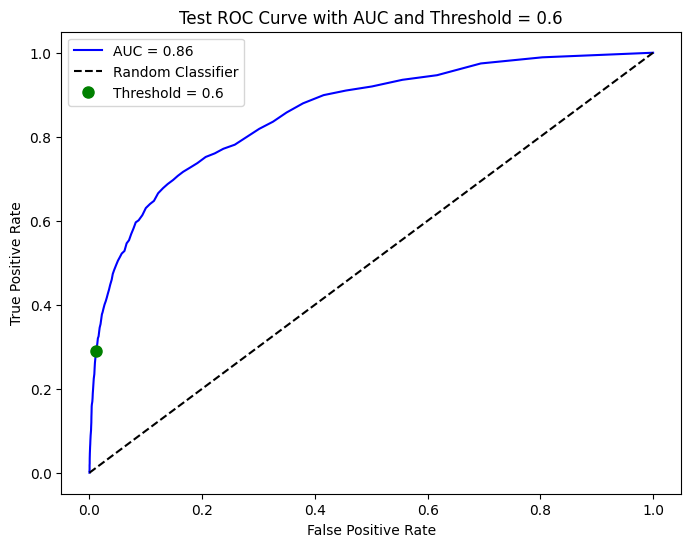

Test Accuracy Score (threshold 0.6): 0.96
Threshold 0.6: TPR = 0.29, FPR = 0.01


In [49]:
# Running on test data
test_probabilities = rf5.predict_proba(X_test_scaled)[:, 1]
test_predictions_default = (test_probabilities >= threshold_default).astype(int)
test_predictions_custom1 = (test_probabilities >= threshold_1).astype(int)
test_predictions_custom2 = (test_probabilities >= threshold_2).astype(int)

# Calculate ROC metrics
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probabilities)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

# Print TPR/FPR for default threshold (0.5)
calculate_tpr_fpr(y_test, test_predictions_default, "Default Threshold 0.5")
print(f'Test Accuracy Score (default threshold 0.5): {accuracy_score(y_test, test_predictions_default):.2f}')

# Plot ROC Curve for test data with threshold_1
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_1
chosen_idx_1 = np.argmin(np.abs(test_thresholds - threshold_1))
plt.plot(test_fpr[chosen_idx_1], test_tpr[chosen_idx_1], 'ro', markersize=8, label=f'Threshold = {threshold_1}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_1}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_1
print(f'Test ROC AUC Score: {test_roc_auc:.2f}')
print(f'Test Accuracy Score (threshold {threshold_1}): {accuracy_score(y_test, test_predictions_custom1):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom1, f"Threshold {threshold_1}")

# Plot ROC Curve for test data with threshold_2
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Marker for threshold_2
chosen_idx_2 = np.argmin(np.abs(test_thresholds - threshold_2))
plt.plot(test_fpr[chosen_idx_2], test_tpr[chosen_idx_2], 'go', markersize=8, label=f'Threshold = {threshold_2}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Test ROC Curve with AUC and Threshold = {threshold_2}")
plt.legend()
plt.show()

# Print test accuracy and TPR/FPR for threshold_2
print(f'Test Accuracy Score (threshold {threshold_2}): {accuracy_score(y_test, test_predictions_custom2):.2f}')
calculate_tpr_fpr(y_test, test_predictions_custom2, f"Threshold {threshold_2}")



# Conclusion


The 4th Model with class_weights, SMOTE, and Scaling and new features added in training, produced the highest ROC AUC score of 0.91 for test and 0.90 for Validation.

Feature Selection with selectkbest, did not manage to achieve a higher score than the model without feature selection.

For Comparison:

Old:
Validation ROC AUC Score: 0.87
Test ROC AUC: 0.88

New:
Validation ROC AUC Score: 0.90
Test ROC AUC: 0.91